In [11]:
import pandas as pd
import numpy as np
from functools import reduce
import pandas_datareader.data as web
import datetime
import random
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.style.use('ggplot')
figsize = (15, 8)

In [12]:
start, end = datetime.datetime(2009, 12, 30), datetime.datetime(2019, 5, 29)
tickers = ["^DJI", "^IXIC", "^GSPC", "^STOXX50E", "^N225", "^GDAXI"]
asset_universe = pd.DataFrame([web.DataReader(ticker, 'yahoo', start, 
                     end).loc[:, 'Adj Close'] for ticker in tickers],
                     index=tickers).T.fillna(method='ffill')
asset_universe = asset_universe/asset_universe.iloc[0, :]

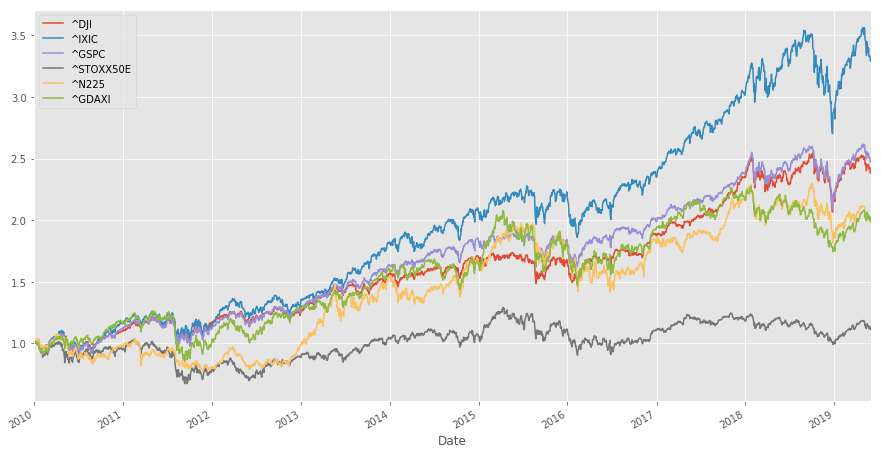

In [13]:
asset_universe.plot(figsize=figsize);

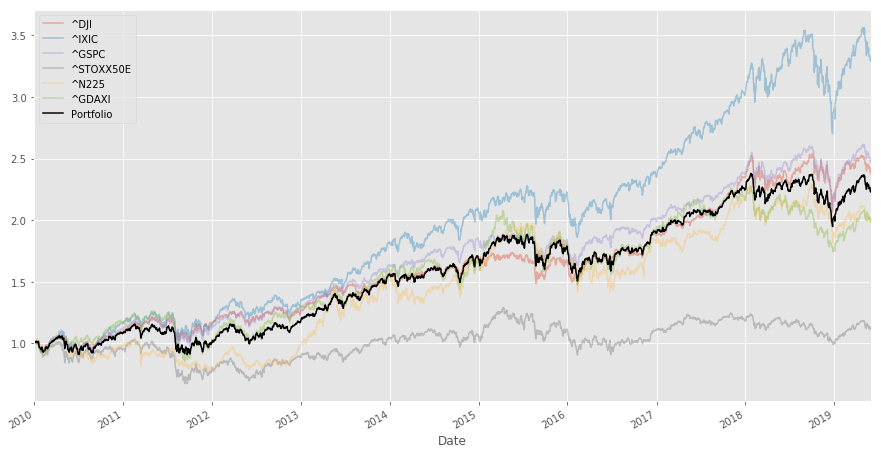

In [14]:
portfolio_returns = asset_universe.pct_change().dropna().mean(axis=1)
portfolio = (asset_universe.pct_change().dropna().mean(axis=1) + 1).cumprod()
asset_universe.plot(figsize=figsize, alpha=0.4)
portfolio.plot(label='Portfolio', color='black')
plt.legend()
plt.show()

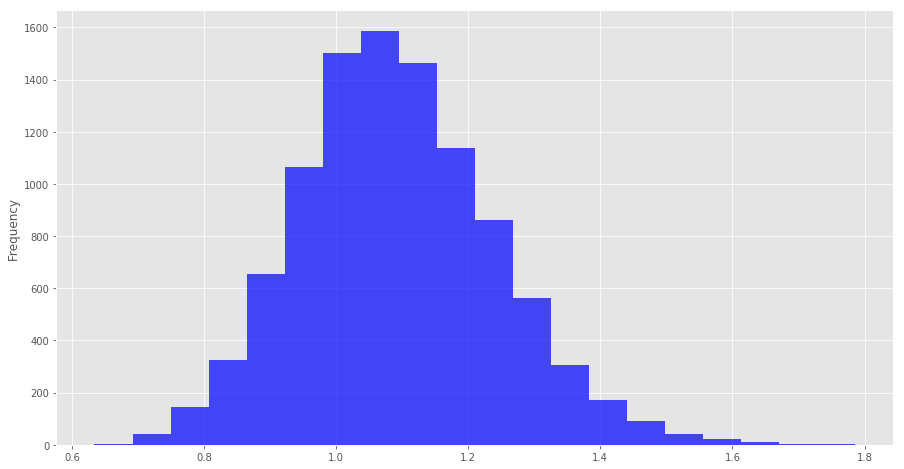

In [182]:
np.random.seed(0)

portfolio_bootstrapping = (1+pd.DataFrame([random.choices(list(
    portfolio_returns.values), k=252) for i in 
    range(10000)]).T.shift(1).fillna(0)).cumprod()

portfolio_bootstrapping.iloc[-1].plot.hist(figsize=figsize, legend=False, color='b', alpha=0.7, bins=20);

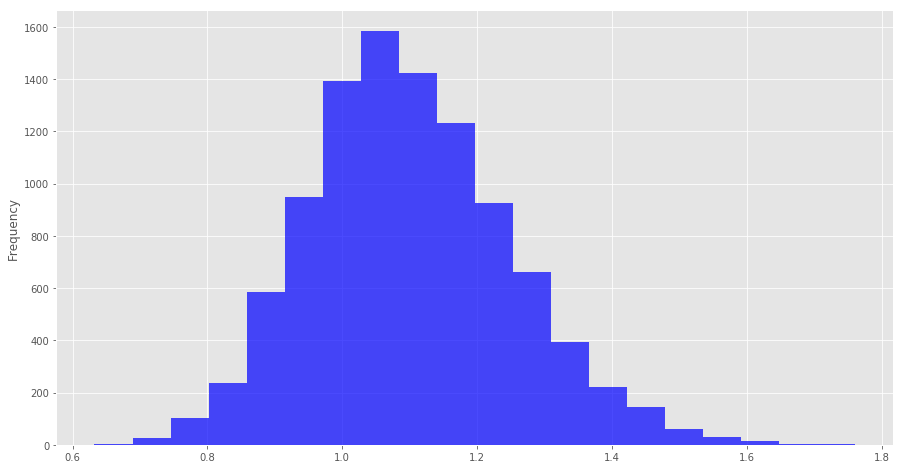

In [183]:
np.random.seed(0)

data = [np.random.choice(list(portfolio_returns.values), size=(252, 10000))]
data = (1+pd.DataFrame(data[0])).cumprod()

data.iloc[-1].plot.hist(figsize=figsize, legend=False, color='b', alpha=0.7, bins=20);

In [184]:
print(portfolio_bootstrapping.mean().mean())
print(data.mean().mean())

1.045460506191234
1.0500492012287612


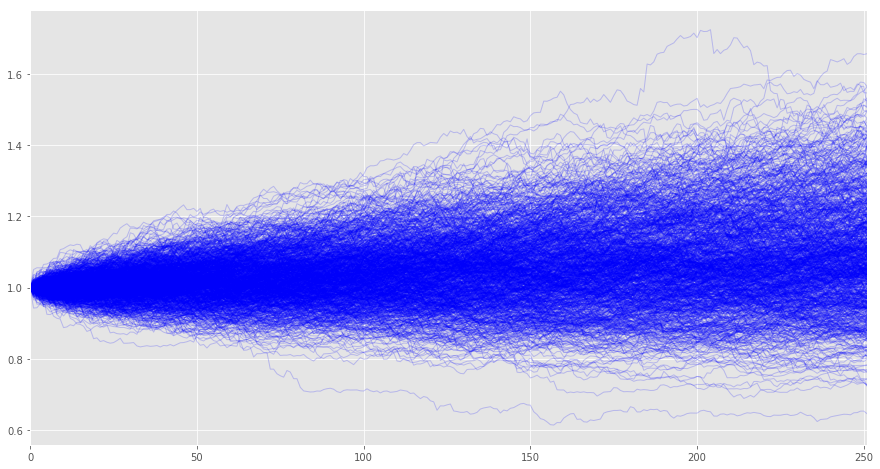

In [16]:
portfolio_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='b');

In [19]:
asset_universe_returns = asset_universe.pct_change()
portfolio_constituents_bootstrapping = pd.DataFrame([((asset_universe_returns.iloc[random.choices(
    range(len(asset_universe)), k=252)]).mean(axis=1)+1).cumprod().values 
    for x in range(1000)]).T

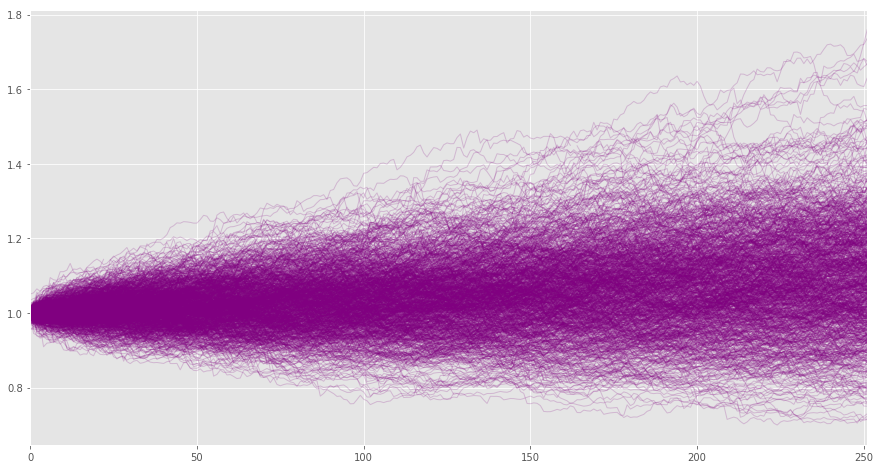

In [20]:
portfolio_constituents_bootstrapping.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='purple');

In [21]:
mu = portfolio_returns.mean()
sigma = portfolio_returns.std()
print(f'Our portfolio mean return value is {round(mu*100,2)}%')
print(f'Our portfolio standard deviation value is {round(sigma*100,2)}%')

Our portfolio mean return value is 0.04%
Our portfolio standard deviation value is 0.86%


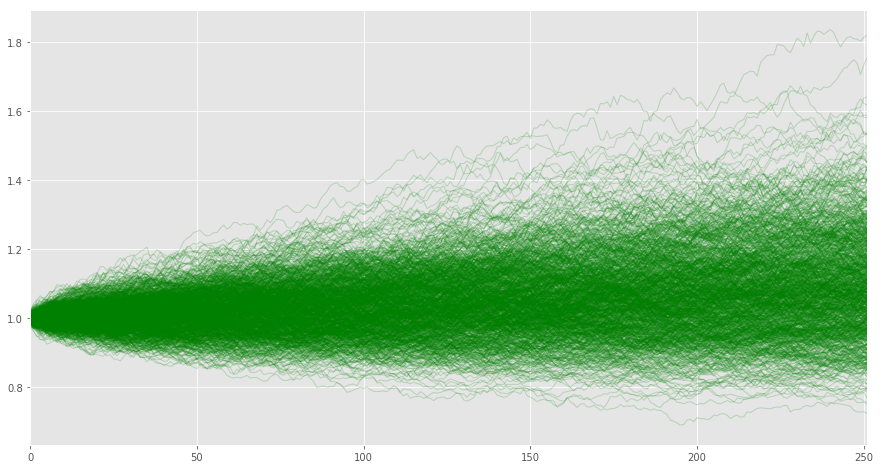

In [22]:
portfolio_mc = pd.DataFrame([(np.random.normal(loc=mu, scale=sigma, size=252)+1) for x in range(1000)]).T.cumprod()
portfolio_mc.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='green')

In [23]:
asset_returns_dfs = []
for asset in asset_universe_returns.mean().index:
    mu = asset_universe_returns.mean()[asset]
    sigma = asset_universe_returns.std()[asset]
    asset_mc_rets = pd.DataFrame([(np.random.normal(loc=mu, 
                    scale=sigma, size=252)) for x in range(1000)]).T
    
    asset_returns_dfs.append(asset_mc_rets)

In [26]:
weighted_asset_returns_dfs = [(returns_df / len(tickers)) for returns_df in asset_returns_dfs]

In [27]:
portfolio_constituents_mc = (reduce(lambda x, y: x + y,weighted_asset_returns_dfs) + 1).cumprod()

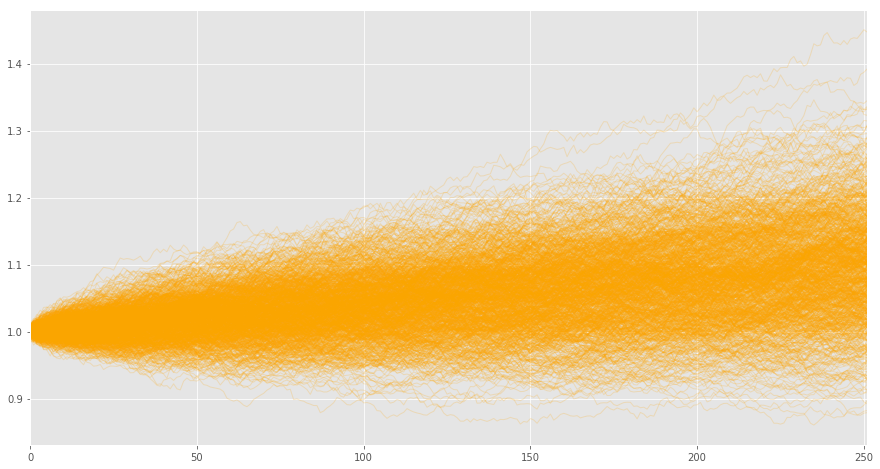

In [28]:
portfolio_constituents_mc.plot(figsize=figsize, legend=False, linewidth=1, alpha=0.2, color='orange');

[]

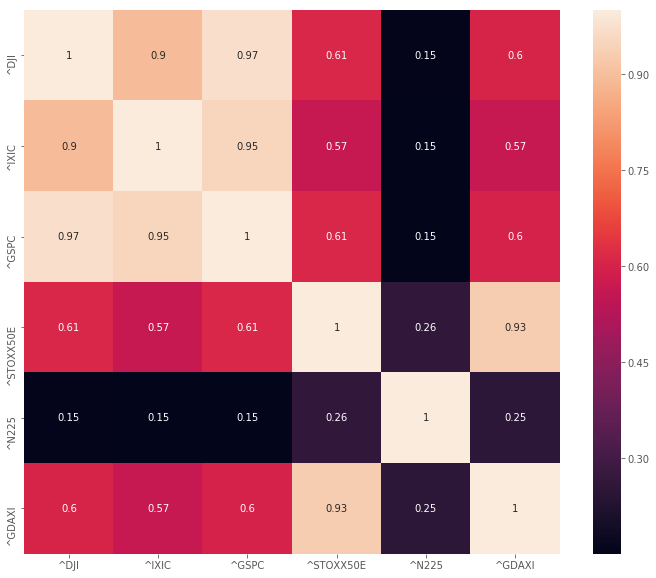

In [29]:
ax, fig = plt.subplots(figsize=(12,10))
sns.heatmap(asset_universe_returns.corr(),annot=True)
plt.plot()